 # Tide gauge analysis

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
#import SeaLevelContrib as slc
#from scipy.special import factorial

# Make higher quality figures
%config InlineBackend.figure_format ='retina'

In [30]:
def tide_gauge_obs(tg_id=[20, 22, 23, 24, 25, 32], interp=False):
    '''Read a list of tide gauge data and compute the average. 
    Set interp to True for a linear interpollation of missing values.
    By default use the 6 tide gauges from the zeespiegelmonitor''' 
    
    tg_data_dir = '/Users/dewilebars/Projects/Project_SeaLevelBudgets/rlr_annual'
    names_col = ('id', 'lat', 'lon', 'name', 'coastline_code', 'station_code', 
                 'quality')
    filelist_df = pd.read_csv(tg_data_dir + '/filelist.txt', sep=';', 
                              header=None, names=names_col)
    filelist_df = filelist_df.set_index('id')

    names_col2 = ('time', 'height', 'interpolated', 'flags')

    for i in range(len(tg_id)):
        tg_data = pd.read_csv(tg_data_dir + '/data/' + str(tg_id[i]) + 
                              '.rlrdata', sep=';', header=None, names=names_col2)
        tg_data = tg_data.set_index('time')
        tg_data.height = tg_data.height.where(~np.isclose(tg_data.height,-99999))
        #tg_data.height = tg_data.height - tg_data.height.mean()

        if i==0:
            tg_data_df = pd.DataFrame(data=dict(time=tg_data.index, col_name=tg_data.height))
            tg_data_df = tg_data_df.set_index('time')
            tg_data_df.columns  = [str(tg_id[i])] 
        else:
            tg_data_df[str(tg_id[i])] = tg_data.height

    #tg_data_df = tg_data_df[tg_data_df.index >= 1890].copy()
    # 1890 is to follow the choice of the zeespiegelmonitor
    # Alternatively use 1948 to fit with NCEP1 starting date
    if interp:
        tg_data_df = tg_data_df.interpolate(method='slinear')
    tg_data_df['Average'] = tg_data_df.mean(axis=1)
    return tg_data_df * 0.1 # Convert from mm to cm

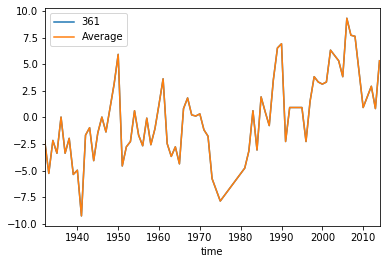

In [7]:
AB1_df = tide_gauge_obs([21], interp = True)
AB2_df = tide_gauge_obs([361], interp = True)

AB2_df.plot()

In [57]:
tg_data_dir = '/Users/dewilebars/Projects/Project_SeaLevelBudgets/rlr_annual'
names_col = ('id', 'lat', 'lon', 'name', 'coastline_code', 'station_code', 'quality')
filelist_df = pd.read_csv(tg_data_dir + '/filelist.txt', sep=';', header=None, 
                          names=names_col)
filelist_df = filelist_df.set_index('id')
filelist_df.loc[filelist_df['coastline_code'] == 150]
#filelist_df['name']

,lat,lon,name,coastline_code,station_code,quality
id,,,,,,
9,51.917500,4.249722,MAASSLUIS,150,61,N
20,51.442222,3.596111,VLISSINGEN,150,101,N
22,51.977500,4.120000,HOEK VAN HOLLAND,150,51,N
23,52.964444,4.745000,DEN HELDER,150,31,N
24,53.326389,6.933056,DELFZIJL,150,1,N
25,53.175556,5.409444,HARLINGEN,150,21,N
32,52.462222,4.554722,IJMUIDEN,150,41,N
236,53.363056,5.220000,WEST-TERSCHELLING,150,11,N
1551,51.619722,3.681944,ROOMPOT BUITEN,150,90,N


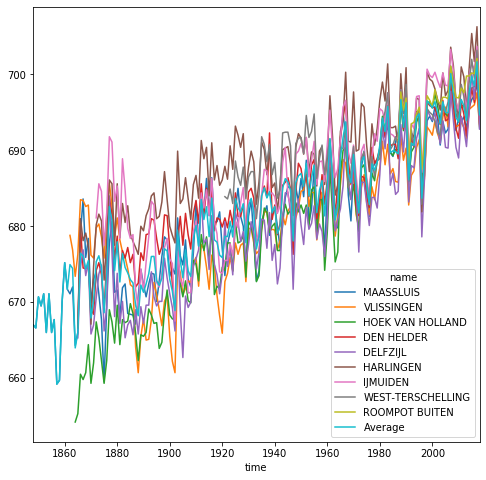

In [75]:
ind_sel = filelist_df.loc[filelist_df['coastline_code'] == 150].index
nl_df = tide_gauge_obs(ind_sel, interp=False)
column_names = filelist_df.loc[filelist_df['coastline_code'] == 150]['name'].copy()
column_names['all'] = 'Average'
nl_df.columns = column_names.str.strip()
nl_df.plot(figsize=(8,8))
#names_col2 = ('time', 'height', 'interpolated', 'flags')

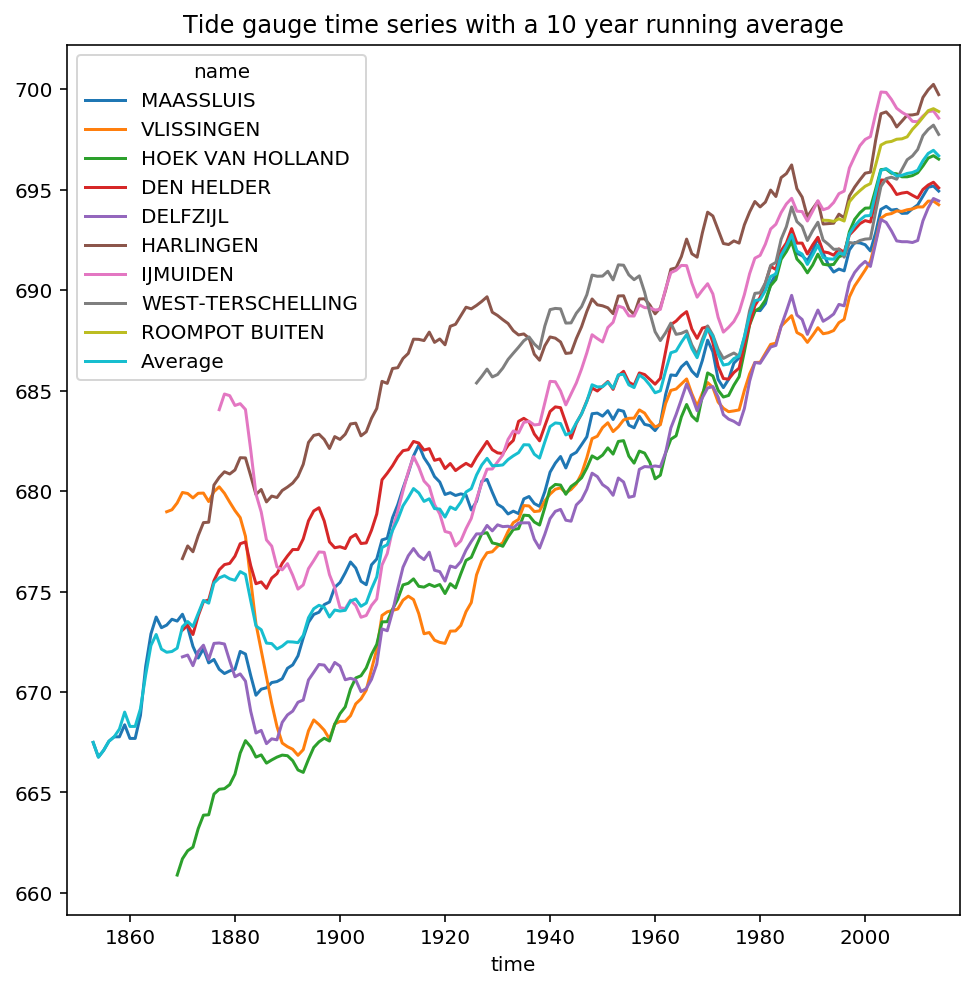

In [105]:
# Running average plot
nl_df.rolling(10, center=True).mean().plot(figsize=(8,8), 
    title='Tide gauge time series with a 10 year running average')


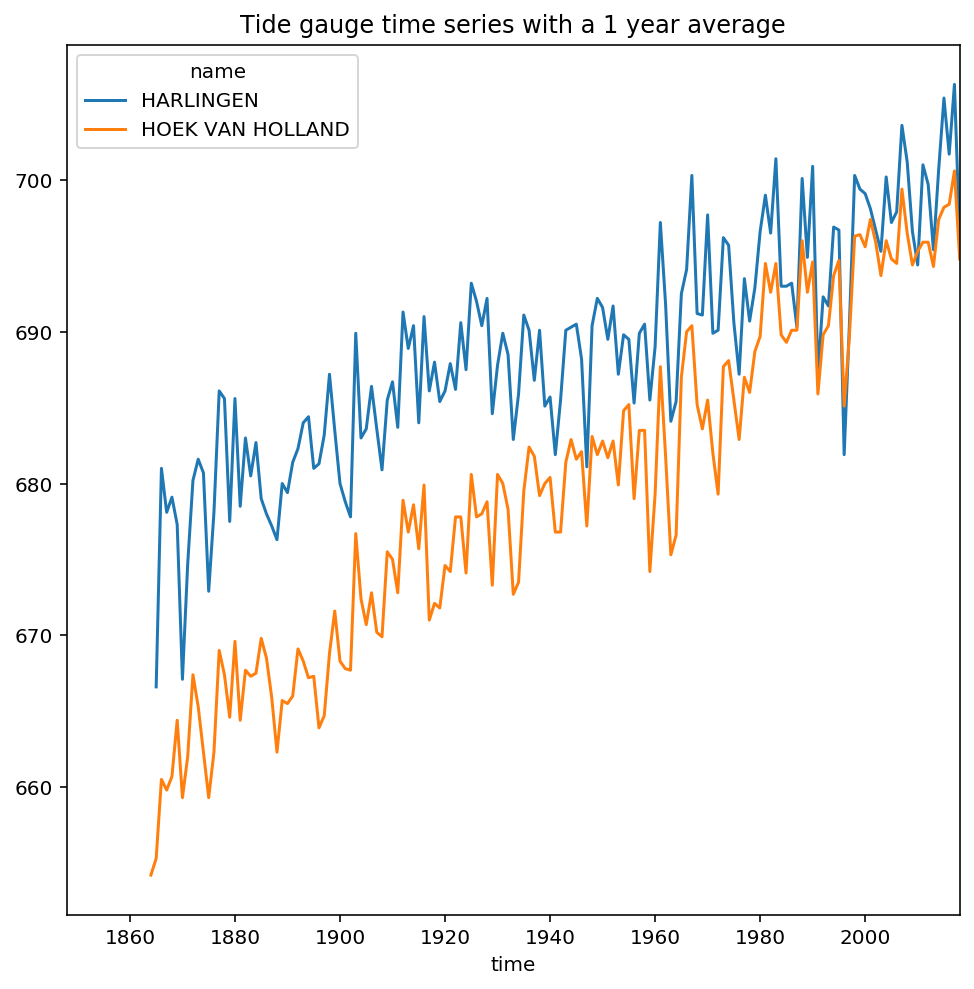

In [106]:
nl_df[['HARLINGEN', 'HOEK VAN HOLLAND']].plot(figsize=(8,8), 
        title='Tide gauge time series with a 1 year average')

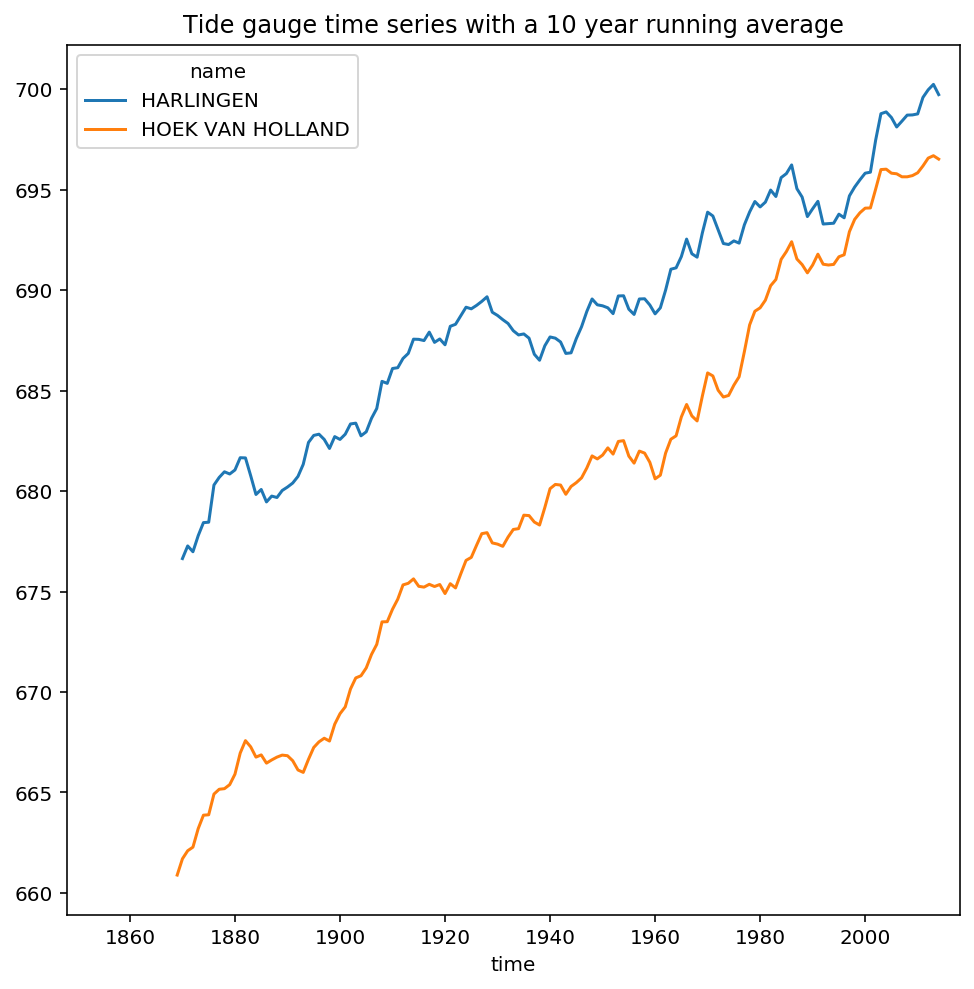

In [111]:
nl_df[['HARLINGEN', 'HOEK VAN HOLLAND']].rolling(
    10, center=True).mean().plot(figsize=(8,8), 
    title='Tide gauge time series with a 10 year running average')

In [95]:
# Compute the linear trend
sd = [1865, 1900, 1950, 1970, 2000]
ed = 2018
for sdi in sd:
    print('Start date:' + str(sdi))
    lin_trend = np.polyfit(np.arange(sdi,ed+1), 
                           nl_df[['HARLINGEN', 'HOEK VAN HOLLAND']]
                           .loc[sdi:ed], 1)[0,:]
    print(lin_trend)

Start date:1865
[0.14169332 0.23703246]
Start date:1900
[0.13166358 0.2285344 ]
Start date:1950
[0.16968579 0.27212276]
Start date:1970
[0.17590816 0.27329592]
Start date:2000
[0.21561404 0.11210526]


In [ ]:
# Compute trends for different time periods
# Max/min trends for the 1890-present period